In [ ]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from env_utils import *
from Bot import *

n = 40
num_trials = 50
q_values = np.arange(0, 1.05, 0.05)  # Range of q values from 0 to 1 in intervals of 0.05

# dictionary to store all the results
results = {
    'Bot 1': {'success': [], 'failures': []},
    'Bot 2': {'success': [], 'failures': []},
    'Bot 3': {'success': [], 'failures': []},
    'Bot 4': {'success': [], 'failures': []},
}

# bot functions to iterate over for the simulations
bot_functions = {
    'Bot 1': time_lapse_fn_bot_1,
    'Bot 2': time_lapse_fn_bot2,
    'Bot 3': time_lapse_fn_bot3,
    'Bot 4': time_lapse_fn_bot4_prob_safe,
}

for q in q_values:
    for trial in range(num_trials):
        # generating a particular random seed in each simulation for consistency across bots
        seed_value = random.randrange(1, 100000)
        random.seed(seed_value)
        np.random.seed(seed_value)

        # Initialize the grid and element positions
        grid = grid_init(n)
        button_pos = button_init(grid, n, 3)
        bot_pos = bot_init(grid, n, 4)
        fire_init = fire_init_fn(grid, n, 2)

        for bot_type, bot_function in bot_functions.items():
            print(f"Running {bot_type} with q={q}, trial={trial+1}")
            # environment for each bot
            current_grid = grid.copy()
            frames = []
            # bot function runs and collects log_data
            log_data = bot_function(current_grid, q, n, frames, bot_pos, button_pos, fire_init, seed_value, trial)
            # Collecting results
            if log_data is not None:
                if log_data['result'] == 'Success':
                    results[bot_type]['success'].append((q))
                else:
                    results[bot_type]['failures'].append((q))
            else:
                print(f"{bot_type} returned None for q={q}, trial={trial+1}")

Bot 1 Accuracy: 70.54%
Bot 2 Accuracy: 73.42%
Bot 3 Accuracy: 72.83%
Bot 4 Accuracy: 73.24%


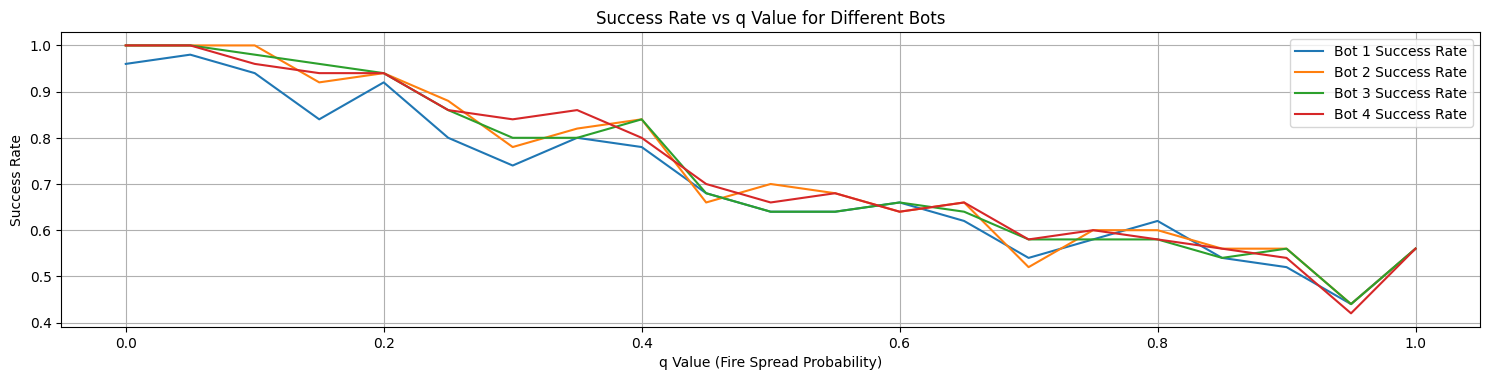

In [8]:
# Calculating and printing the percentage accuracy of each bot (across all simulations)
for bot_type in bot_functions.keys():
    total_trials = len(results[bot_type]['success']) + len(results[bot_type]['failures'])
    if total_trials > 0:
        accuracy = (len(results[bot_type]['success']) / total_trials) * 100
        print(f"{bot_type} Accuracy: {accuracy:.2f}%")
    else:
        print(f"{bot_type} Accuracy: No trials conducted")

# Plotting the results
plt.figure(figsize=(15, 7))

# Success rate plot
plt.subplot(2, 1, 1)
for bot_type in bot_functions.keys():
    q_success_rate = []
    for q in q_values:
        success_count = results[bot_type]['success'].count(q)
        q_success_rate.append(success_count / num_trials)
    plt.plot(q_values, q_success_rate, label=f'{bot_type} Success Rate')
plt.xlabel('q Value (Fire Spread Probability)')
plt.ylabel('Success Rate')
plt.title('Success Rate vs q Value for Different Bots')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()